In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential, Model
from keras.layers import *
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, TensorBoard
from keras.optimizers import Adam, SGD
from keras.initializers import glorot_uniform
from keras.utils import plot_model
import keras.backend as K
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
import sklearn
from matplotlib.colors import LogNorm
import data
import model

Using TensorFlow backend.


In [2]:
batch_size = 16
training_size = 2913
testing_size = 210

train_gen = data.data_gen('dataset/images_train', 'dataset/annotations_train', batch_size=batch_size, one_hot=True)
test_gen = data.data_gen('dataset/images_test', 'dataset/annotations_test', batch_size=batch_size, one_hot=True)
x, y = next(test_gen)

### Model 2020_06_09-09_55_28 (Weight BG=0.1) (ref)

SGD, lr=0.0001, momentum=.9, custom CCE weighted (bg=.1) loss, batch_size=32, epochs=582, steps=5
- train accuracy: 68.96% (Mais l'accuracy n'est pas weighted !)
- loss: .5846
- precision: .8410

In [3]:
m = keras.models.load_model('experiments/model.2020_06_09-09_55_28.h5', custom_objects={'loss': model.weighted_categorical_crossentropy([.1 if i==0 else 1 for i in range(21)])})

True Negatives:  2299025
False Positives:  757
False Negatives:  15
True Positives:  3


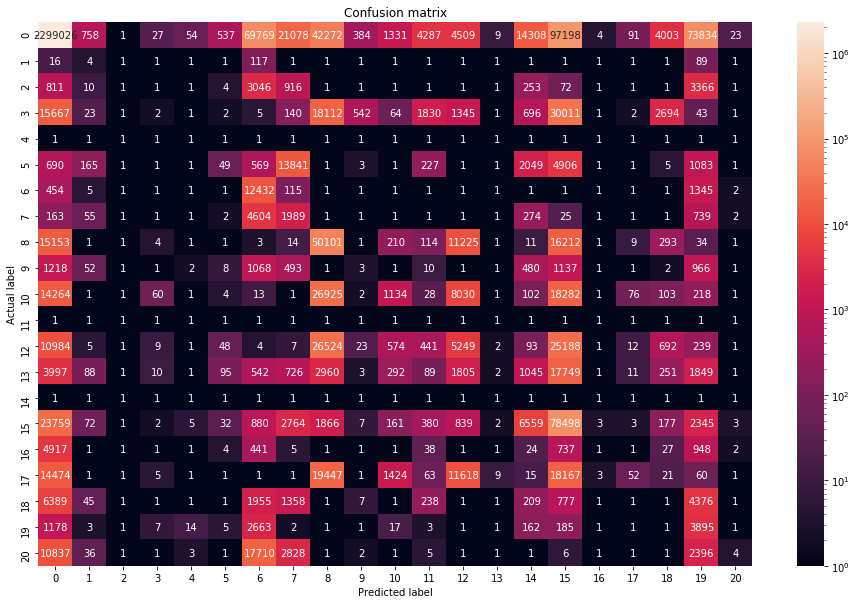

In [6]:
y_true, y_pred = model.predict_dataset(m, test_gen, 50, batch_size)
data.confusion_matrix(y_true, y_pred)

In [5]:
y_hat = m.predict(x)

In [16]:
true_positives = np.sum(np.round(np.clip(y * y_hat, 0, 1)))
predicted_positives = np.sum(np.round(np.clip(y_hat, 0, 1)))
precision = true_positives / (predicted_positives + 1e-7)
print('Precision:', precision)

Precision: 0.8410481419920751


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


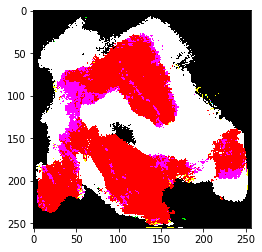

In [9]:
mask = data.mask_class_to_rgb(np.argmax(y_hat[3], axis=2))
plt.imshow(mask)
#plt.savefig('concat_cowA.png', bbox_inches='tight')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car:          2.57%
cat:          9.47%
chair:        0.02%
cow:          0.97%
dinningtable: 4.41%
dog:          2.47%
horse:        0.00%
motorbike:    1.45%
person:       74.78%
sheep:        0.02%
sofa:         3.75%
train:        0.08%


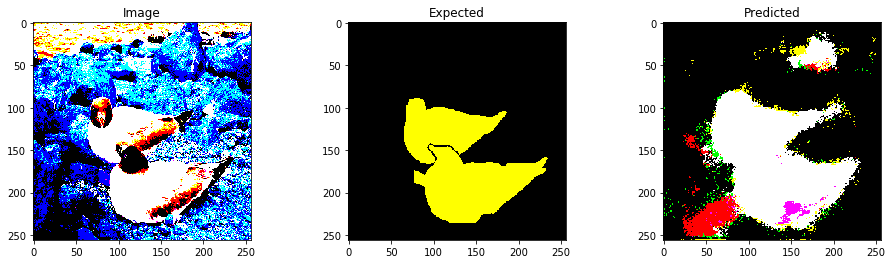

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


bus:          53.80%
car:          0.02%
train:        46.17%


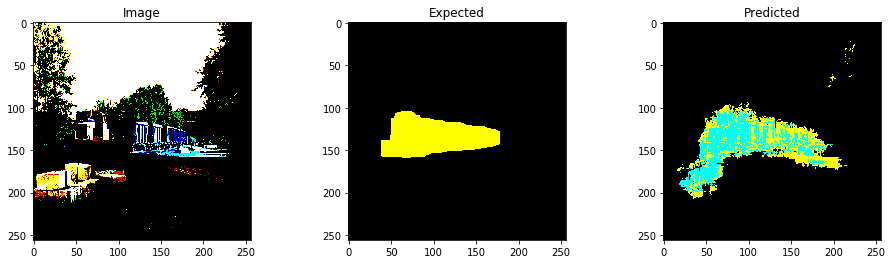

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


aeroplane:    0.03%
boat:         0.05%
bus:          73.82%
car:          0.13%
dinningtable: 0.04%
train:        25.93%
tvmonitor:    0.01%


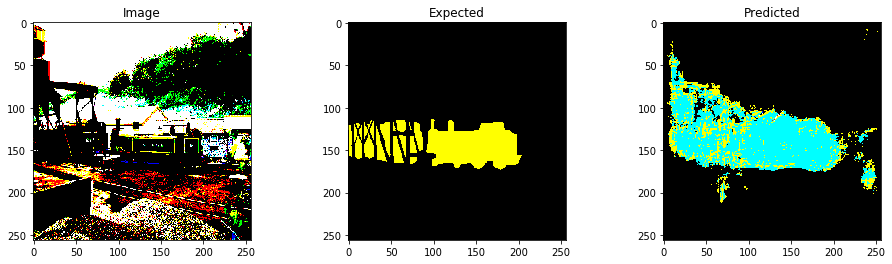

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


aeroplane:    0.01%
bird:         0.01%
bottle:       0.00%
bus:          0.01%
car:          0.03%
cat:          43.61%
cow:          0.49%
dinningtable: 0.08%
dog:          9.10%
horse:        0.01%
motorbike:    0.13%
person:       46.37%
sheep:        0.00%
sofa:         0.05%
train:        0.10%


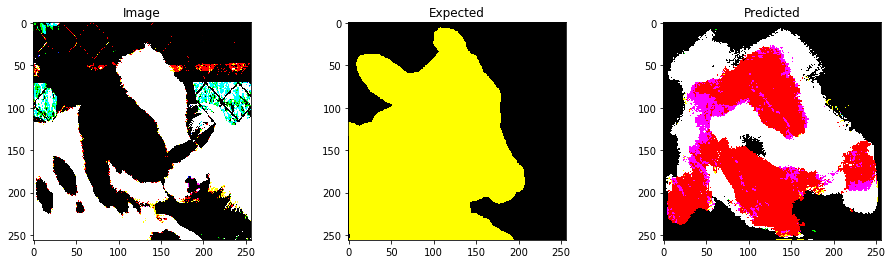

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


aeroplane:    0.22%
boat:         0.00%
bottle:       0.02%
bus:          68.14%
car:          4.85%
dinningtable: 0.01%
motorbike:    2.93%
person:       2.37%
sofa:         0.06%
train:        21.38%
tvmonitor:    0.01%


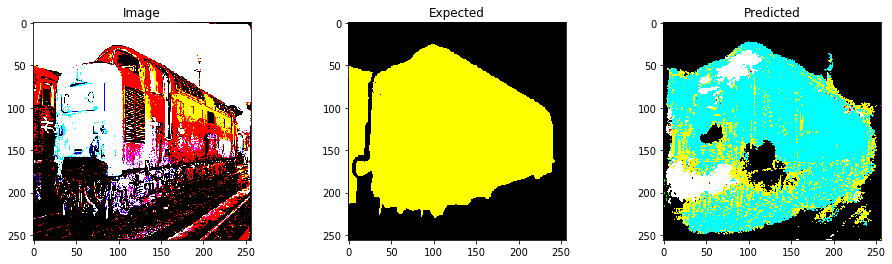

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


aeroplane:    0.16%
bus:          6.37%
car:          0.16%
cow:          0.41%
dinningtable: 0.90%
motorbike:    0.65%
person:       85.22%
pottedplant:  0.08%
train:        6.04%


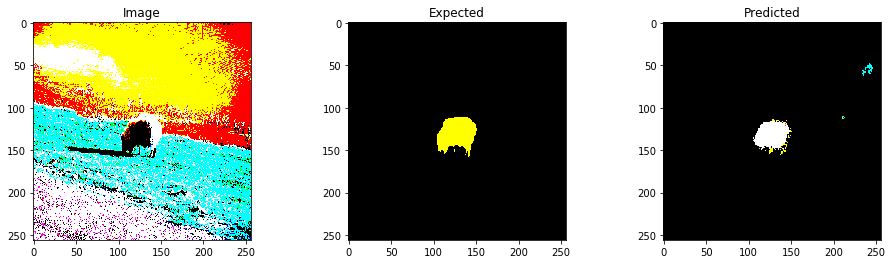

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


boat:         0.09%
bus:          60.58%
train:        39.33%


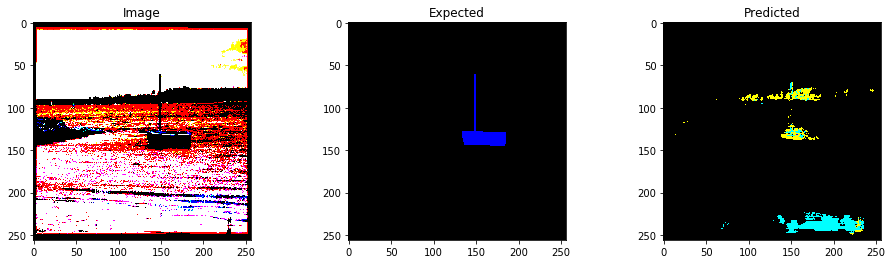

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


aeroplane:    1.08%
boat:         0.03%
bottle:       0.12%
bus:          21.28%
car:          15.52%
chair:        0.00%
cow:          0.00%
dinningtable: 0.06%
dog:          0.01%
motorbike:    23.89%
person:       13.03%
pottedplant:  0.00%
sofa:         0.01%
train:        24.90%
tvmonitor:    0.05%


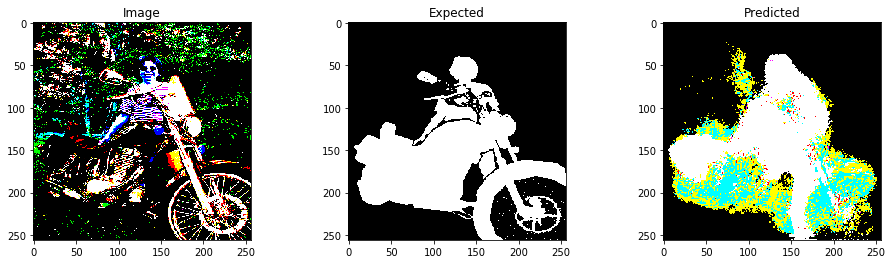

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


aeroplane:    1.08%
boat:         0.01%
bottle:       0.16%
bus:          5.83%
car:          23.24%
chair:        0.01%
dinningtable: 1.97%
motorbike:    25.57%
person:       33.00%
sofa:         0.31%
train:        8.80%
tvmonitor:    0.01%


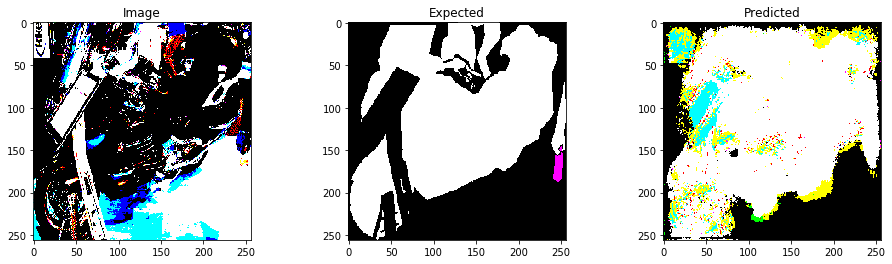

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


bird:         0.04%
bottle:       0.00%
bus:          0.01%
cat:          61.78%
cow:          1.09%
dinningtable: 0.01%
dog:          23.24%
motorbike:    0.26%
person:       11.36%
sheep:        0.25%
sofa:         0.07%
train:        1.89%


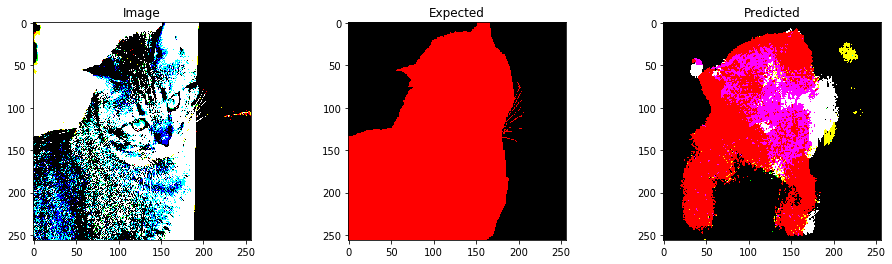

In [10]:
for i in range(10):
    plt.figure(figsize=(16, 4))
    data.display_result(x, y, y_hat, i)
    plt.show()

### Model 2020_06_10-13_29_52 - No concat

SGD, lr=0.0001, momentum=.9, custom CCE weighted (bg=.1) loss, batch_size=32, epochs=582, steps=5
- train accuracy: 69.72% (Mais l'accuracy n'est pas weighted !)
- loss: .7092
- precision: .9809

In [4]:
w = [0.1 if i==0 else 1 for i in range(21)]
m2 = model.get_model_without_concat()
m2.compile(optimizer=SGD(learning_rate=0.0001, momentum=.9),
          loss=model.weighted_categorical_crossentropy(weights=w),
          metrics=['accuracy', keras.metrics.Precision()])
m2.load_weights('experiments/model.2020_06_10-13_29_52.h5')

/home/rhidra/.local/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [5]:
y_hat = m2.predict(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


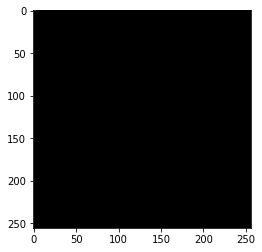

In [9]:
mask = data.mask_class_to_rgb(np.argmax(y_hat[6], axis=2))
plt.imshow(mask)
#plt.savefig('concat_boatB.png', bbox_inches='tight')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car:          0.02%
cat:          0.50%
person:       99.47%
sofa:         0.01%


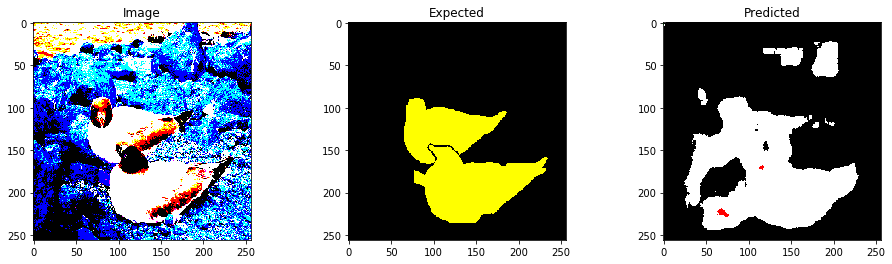

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car:          1.16%
person:       98.06%
sofa:         0.78%


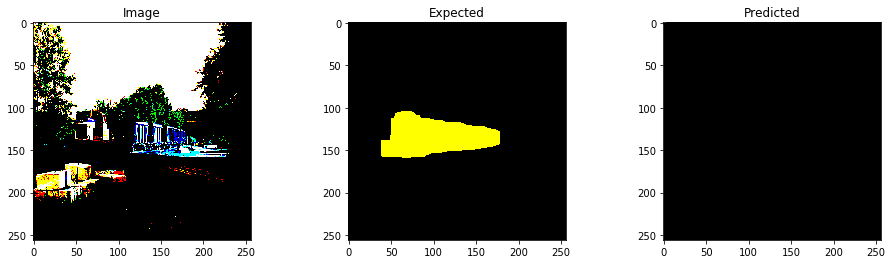

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car:          0.66%
person:       99.34%


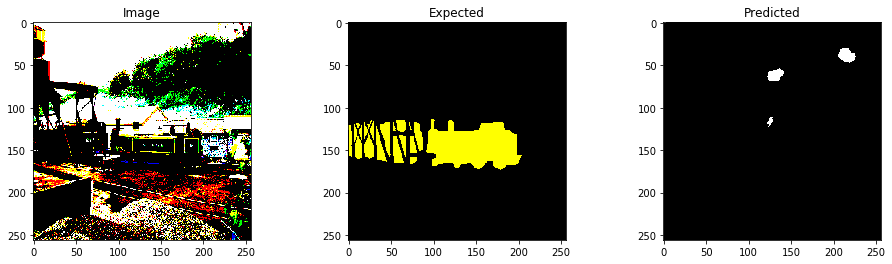

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car:          0.01%
cat:          37.42%
person:       62.57%
sofa:         0.01%


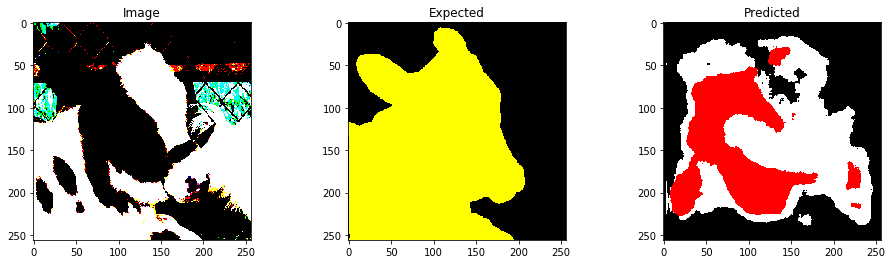

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car:          0.27%
motorbike:    0.18%
person:       99.37%
sofa:         0.18%


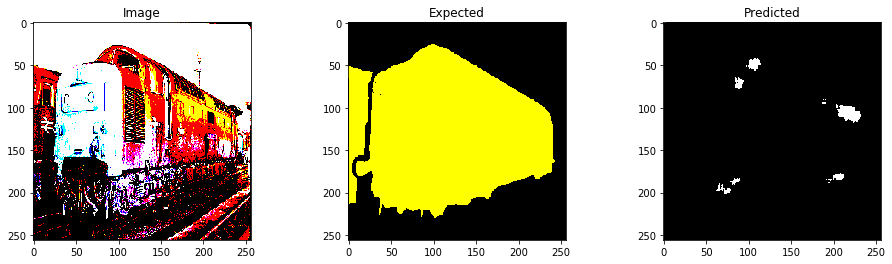

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car:          0.28%
person:       99.53%
sofa:         0.19%


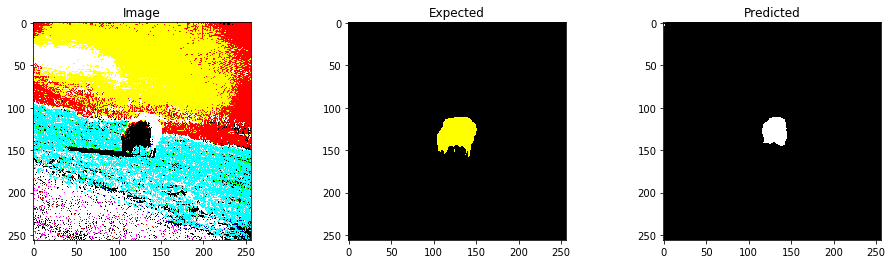

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car:          1.94%
person:       98.06%


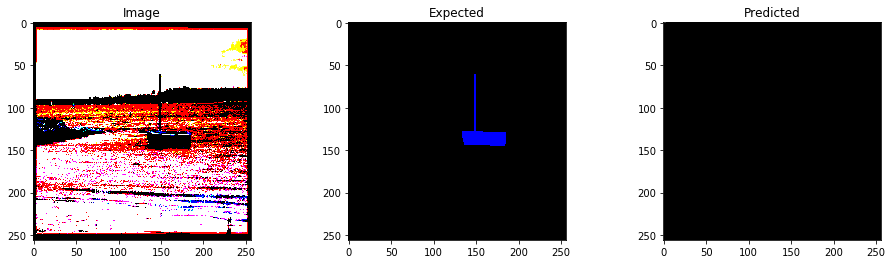

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car:          0.02%
person:       99.97%
sofa:         0.01%


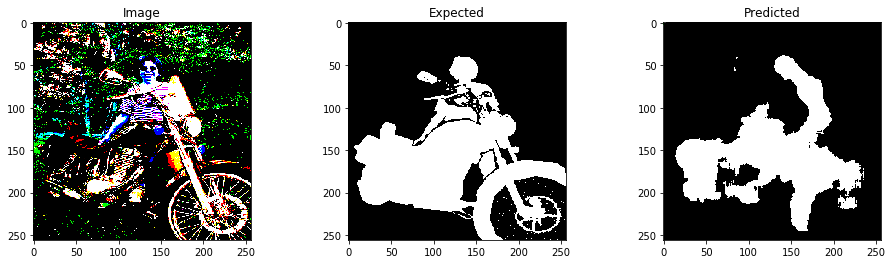

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car:          0.01%
person:       99.99%
sofa:         0.01%


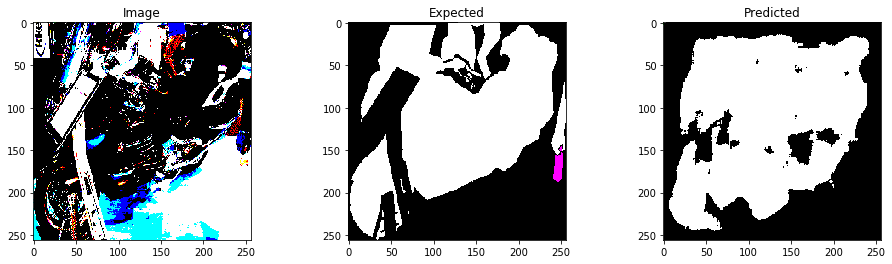

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car:          0.01%
cat:          52.93%
person:       47.05%
sofa:         0.01%


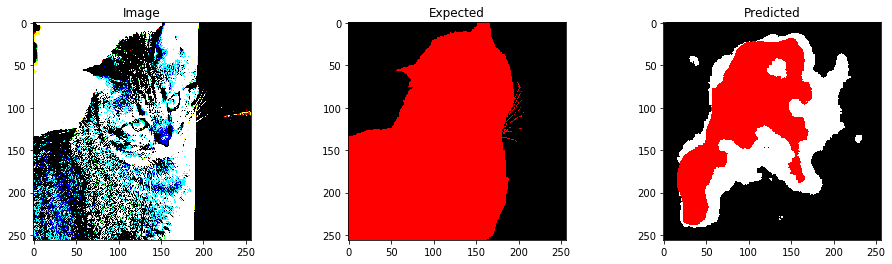

In [6]:
for i in range(10):
    plt.figure(figsize=(16, 4))
    data.display_result(x, y, y_hat, i)
    plt.show()